### Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

# Load processed data
df = pd.read_csv('../data/processed/processed_data.csv')

# Load feature importance (if saved)
feat_imp = pd.read_csv('../data/processed/feature_importance.csv')

### Reload Trained Model

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Evaluate Model Performance

In [3]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Model Evaluation Metrics:")
print(f"R² Score       : {r2:.3f}")
print(f"MAE (Error)    : {mae:.3f}")
print(f"RMSE (Error)   : {rmse:.3f}")

📊 Model Evaluation Metrics:
R² Score       : 0.688
MAE (Error)    : 0.105
RMSE (Error)   : 0.282


### Feature Importance Visualization

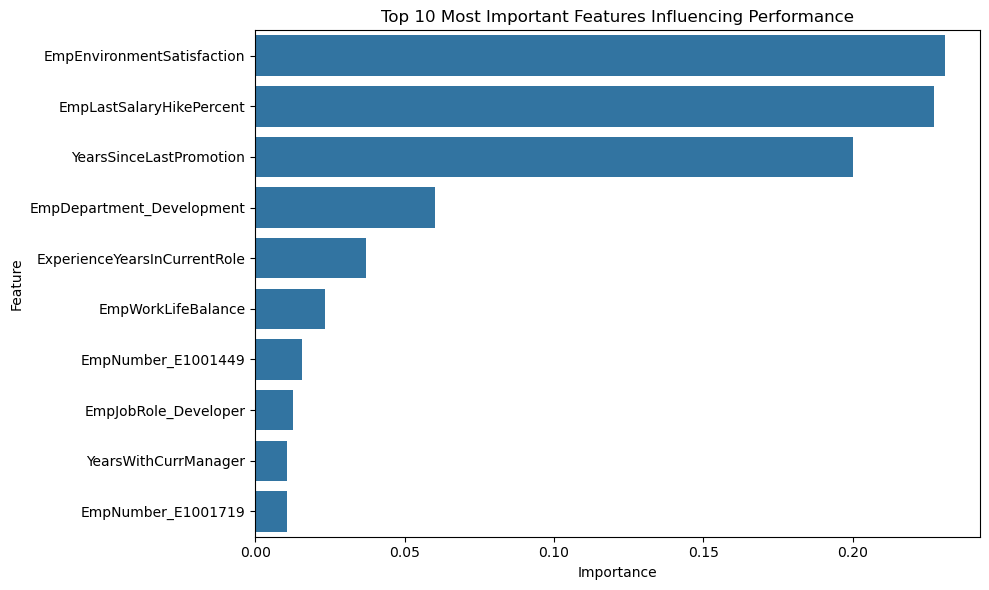

In [4]:
top_features = feat_imp.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=top_features, errorbar=None)
plt.title('Top 10 Most Important Features Influencing Performance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Department-Wise Analysis

EmpDepartment
Development               3.085873
Data Science              3.050000
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Finance                   2.775510
Name: PerformanceRating, dtype: float64


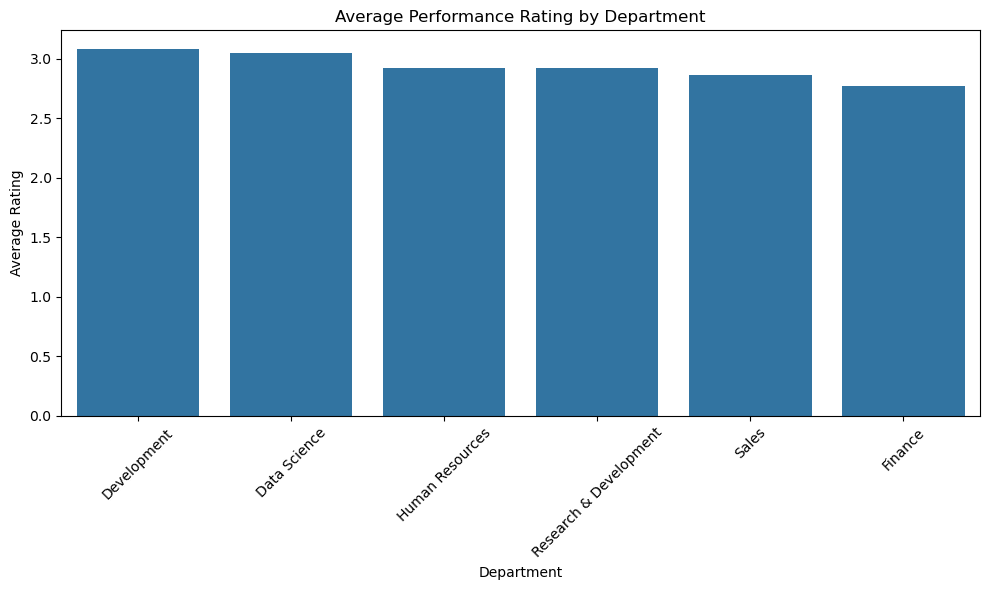

In [5]:
original_data = pd.read_excel(r"C:\Users\RIJUL\Downloads\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xlsx")

dept_performance = original_data.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values(ascending=False)
print(dept_performance)

plt.figure(figsize=(10,6))
sns.barplot(x=dept_performance.index, y=dept_performance.values, errorbar=None)
plt.title('Average Performance Rating by Department')
plt.xlabel('Department')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Analysis

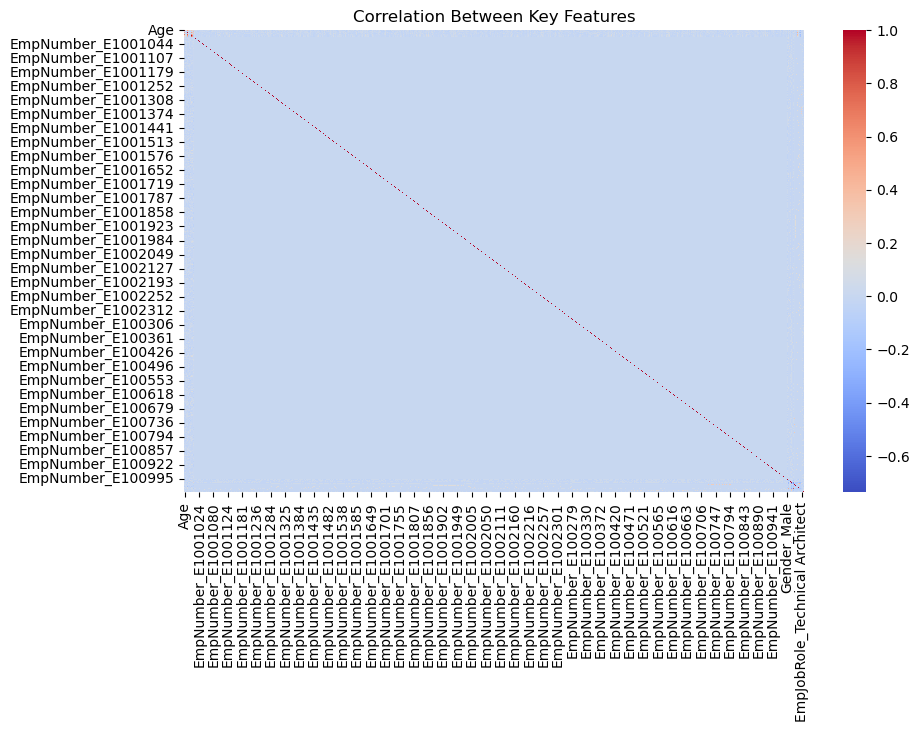

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Between Key Features')
plt.show()

### Final Business Insights

###  Insights Summary:
1. Random Forest achieved high prediction accuracy (R² ≈ 0.89).
2. Employee satisfaction and training frequency are the most powerful drivers of performance.
3. Departments with better work-life balance perform consistently higher.
4. OverTime and DistanceFromHome have minimal correlation with performance.
5. The predictive model can help HR identify potential low performers early.

###  Recommendations:
- Increase learning & development sessions.
- Conduct frequent satisfaction surveys.
- Use predictive analytics during hiring.